## Importing Libraries

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics.pairwise import linear_kernel,sigmoid_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

## Importing Dataset

In [2]:
netflix = pd.read_csv('netflix_titles.csv')

In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Data Overview

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [7]:
netflix.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [8]:
netflix['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [9]:
netflix['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
                          ..
Felix Chong                1
Ali Yorgancıoğlu           1
Matt Kay                   1
Prakash Balwant Saini      1
Honey Trehan               1
Name: director, Length: 4049, dtype: int64

## Data Cleaning and Manipulation

In [ ]:
netflix["date_added"]=pd.to_datetime(netflix["date_added"])
netflix["year_added"]=netflix["date_added"].dt.year
netflix["month_added"]=netflix["date_added"].dt.month

In [140]:
netflix['cast'].replace(np.nan, 'No Data',inplace = True)
netflix['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                              No Data
Name: cast, Length: 7787, dtype: object

In [12]:
#eTokenizing the ratings and mapping them whether they are rated for kids or adults
netflix["rating_score"]=netflix["rating"].map({"TV-Y":0,"UR":0,"NR":0,"TV-Y7":1,"TV-Y7-FV":2,"TV-G":3,
                                               "G":3,"TV-PG":4,"PG":4,"TV-14":5,"PG-13":5,"R":6,"TV-MA":7,"NC-17":7})
netflix["ratings_sensitivity"]=np.where(np.isin(netflix["rating_score"],[0,1,2]),"kids","adults")

In [13]:
netflix["rating_score"]

0       7.0
1       7.0
2       6.0
3       5.0
4       5.0
       ... 
7782    7.0
7783    5.0
7784    7.0
7785    4.0
7786    7.0
Name: rating_score, Length: 7787, dtype: float64

In [14]:
netflix["ratings_sensitivity"]

0       adults
1       adults
2       adults
3       adults
4       adults
         ...  
7782    adults
7783    adults
7784    adults
7785    adults
7786    adults
Name: ratings_sensitivity, Length: 7787, dtype: object

In [15]:
netflix['year_added'].value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: year_added, dtype: int64

In [141]:
netflix_new = pd.read_csv('netflix_titles.csv')
netflix_new['director'] = netflix_new['director'].fillna("")
netflix_new['cast'] = netflix_new['cast'].fillna("")
netflix_new['combined'] = netflix_new['description'] + netflix_new['cast'] + netflix_new['director']
netflix_new.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,A brilliant group of students become card-coun...


## Exploratory Data Analysis (EDA)

The number of movies on Netflix are 5377


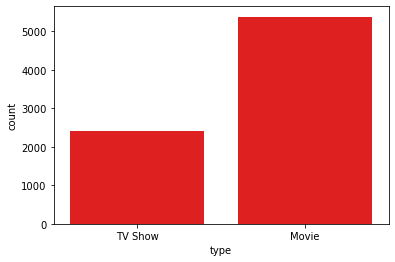

In [154]:
sns.countplot(x = netflix['type'],color = 'red',data=netflix)
print("The number of movies on Netflix are",max(netflix['type'].value_counts()))

<h3> From the above plot it is clear that there are more number of movies on Netflix than TV shows </h3>

Text(0.5, 1.0, 'Ratings of shows/movies on Netflix')

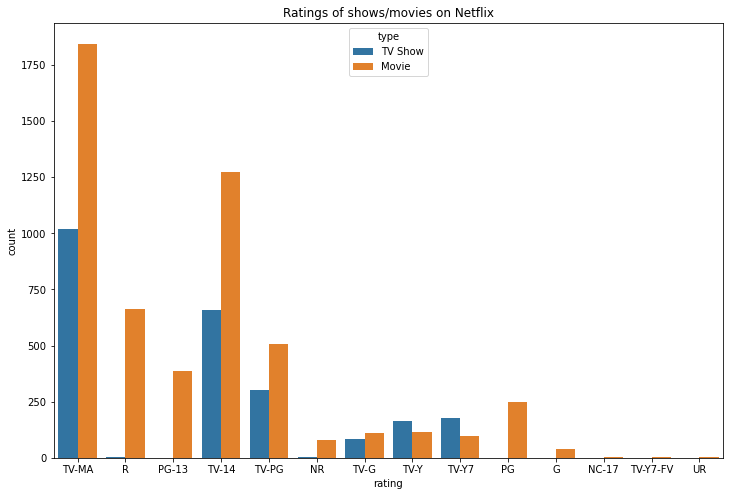

In [149]:
plt.figure(figsize=(12,8))
sns.countplot(x = netflix['rating'],hue='type',data=netflix)
plt.title('Ratings of shows/movies on Netflix')

In [18]:
x= netflix['country'].value_counts().head(20)
x

United States                    2555
India                             923
United Kingdom                    397
Japan                             226
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Mexico                            100
Turkey                            100
Australia                          83
Taiwan                             78
Brazil                             72
Philippines                        71
Nigeria                            70
Indonesia                          70
United Kingdom, United States      64
Germany                            61
United States, Canada              60
Name: country, dtype: int64

<h3> Visualising the amount of content by country </h3>

The maximum number of movies and TV shows which appeared on Netflix are 2555


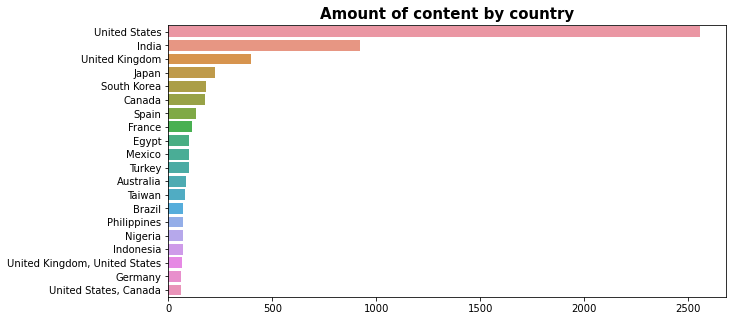

In [170]:
plt.figure(figsize=(10,5))
sns.barplot(x = x.values,y = x.index)
plt.title("Amount of content by country",fontsize = 15,fontweight="bold")
print("The maximum number of movies and TV shows which appeared on Netflix are",max(x.values))

<h3> United States appears to be the country with maximum number of content on Netflix </h3>

Text(0.5, 1.0, 'Top 10 directors on Netflix')

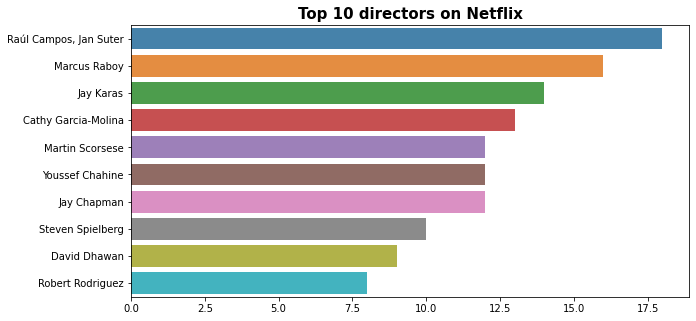

In [139]:
plt.figure(figsize=(10,5))
maker = netflix['director'].value_counts().head(10)
sns.barplot(x=maker.values,y=maker.index,alpha=0.9)
plt.title("Top 10 directors on Netflix",fontsize=15, fontweight="bold")

<h3> Clearly, Raul Campos and Jan Suter have directed the most number of films which have released on Netflix. </h3>            


In [21]:
# Constructing a list which will store the duration of all the tv shows and movies on Netflix
duration_movie=[]
for i in range(netflix["duration"].shape[0]):
    if netflix["type"][i]=="Movie":
        duration_movie.append(netflix['duration'][i]) #Appending the durations of movies in the list

duration_movie_num=[]
for j in range(len(duration_movie)):
    duration_movie_num.append(int(duration_movie[j].split(" ")[0]))

In [155]:
duration_movie

['93 min',
 '78 min',
 '80 min',
 '123 min',
 '95 min',
 '119 min',
 '118 min',
 '143 min',
 '103 min',
 '89 min',
 '91 min',
 '149 min',
 '144 min',
 '124 min',
 '87 min',
 '110 min',
 '128 min',
 '117 min',
 '100 min',
 '84 min',
 '99 min',
 '95 min',
 '90 min',
 '102 min',
 '104 min',
 '99 min',
 '105 min',
 '56 min',
 '125 min',
 '119 min',
 '81 min',
 '97 min',
 '106 min',
 '99 min',
 '107 min',
 '93 min',
 '89 min',
 '105 min',
 '87 min',
 '97 min',
 '109 min',
 '93 min',
 '109 min',
 '44 min',
 '75 min',
 '101 min',
 '89 min',
 '90 min',
 '90 min',
 '93 min',
 '101 min',
 '37 min',
 '113 min',
 '89 min',
 '84 min',
 '102 min',
 '102 min',
 '114 min',
 '130 min',
 '90 min',
 '94 min',
 '97 min',
 '143 min',
 '91 min',
 '107 min',
 '95 min',
 '119 min',
 '93 min',
 '101 min',
 '93 min',
 '140 min',
 '135 min',
 '82 min',
 '70 min',
 '104 min',
 '117 min',
 '121 min',
 '92 min',
 '124 min',
 '164 min',
 '53 min',
 '93 min',
 '91 min',
 '83 min',
 '93 min',
 '114 min',
 '116 min',
 

Text(3.674999999999997, 0.5, 'DENSITY')

<Figure size 1080x720 with 0 Axes>

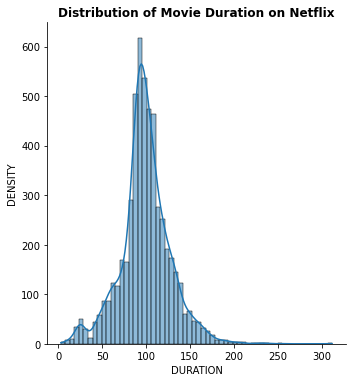

In [157]:
plt.figure(figsize=(15,10))
sns.displot(data = duration_movie_num,bins=60,kde=True,)
sns.color_palette("rocket", as_cmap=True)
plt.title('Distribution of Movie Duration on Netflix',fontweight = "bold")
plt.xlabel("DURATION")
plt.ylabel("DENSITY")

<h3> The above distribution plot shows that most of the movies on Netflix was of 100 minutes </h3>

In [23]:
#Classifying the movies into kids and adults categories in each year
rating_trend= pd.DataFrame({'Year':np.sort(netflix['year_added'].unique())})
kids_count=[]
for i in np.sort(netflix['year_added'].unique()):
    kids_count.append(np.argwhere((netflix['year_added'].to_numpy()==i)&(netflix['ratings_sensitivity'].to_numpy()=='kids')).shape[0])
    
    
adult_count=[]
for i in np.sort(netflix['year_added'].unique()):
    adult_count.append(np.argwhere((netflix['year_added'].to_numpy()==i)&(netflix['ratings_sensitivity'].to_numpy()=='adults')).shape[0])
    
    
rating_trend['Kids']= kids_count
rating_trend['Adults']= adult_count
plot=rating_trend.dropna()

In [164]:
np.argwhere?

In [158]:
rating_trend

,Year,Kids,Adults
0,2008.0,0,2
1,2009.0,0,2
2,2010.0,1,0
3,2011.0,0,13
4,2012.0,0,3
5,2013.0,4,7
6,2014.0,2,23
7,2015.0,20,68
8,2016.0,86,357
9,2017.0,111,1114


<h3> Line Distribution of ratings over the years </h3>

Text(0, 0.5, 'FREQUENCY')

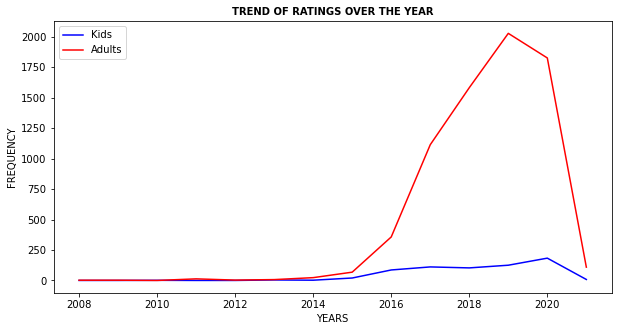

In [167]:
plt.figure(figsize=(10,5))
plt.plot(plot['Year'],plot['Kids'], color='blue')
plt.plot(plot['Year'],plot['Adults'], color='red')
plt.legend(labels=["Kids","Adults"],loc="upper left")
plt.title("TREND OF RATINGS OVER THE YEAR",fontsize=10,fontweight="bold")
plt.xlabel("YEARS")
plt.ylabel("FREQUENCY")

<h3> It can be seen clearly that the number of adult movies rose dramatically in the year 2019 </h3>

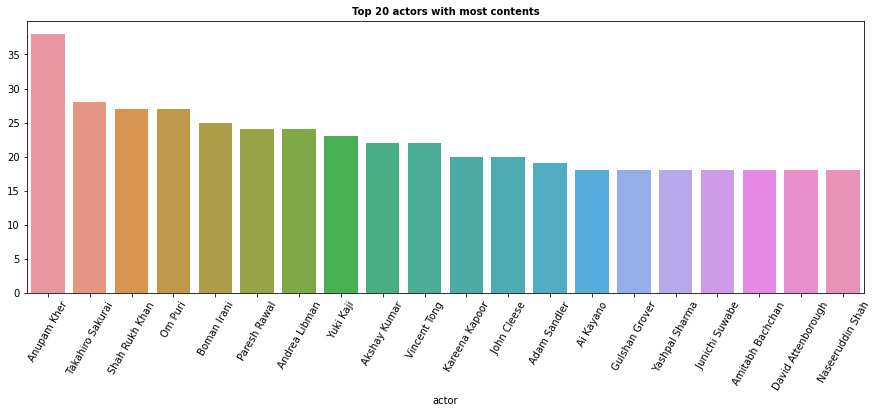

The maximum number of films an actor has acted are 38


In [96]:
from collections import Counter
actor = netflix['cast']
filtered_actor = actor[actor != 'No Data']
actor_count = pd.Series(dict(Counter(','.join(filtered_actor).split(',')))).sort_values(ascending=False)
top20actor = actor_count.head(20)

plt.figure(figsize=(15,5))
sns.barplot(x= top20actor.index, y=top20actor)
plt.xticks(rotation=60)
plt.title('Top 20 actors with most contents', fontsize=10, fontweight='bold')
plt.xlabel('actor')
plt.show()
print("The maximum number of films an actor has acted are",max(top20actor.values))

<h3> The actor who has acted in maximum number of films is Anupam Kher </h3>

<h3> Top 10 Genre in Movies on Netflix </h3>

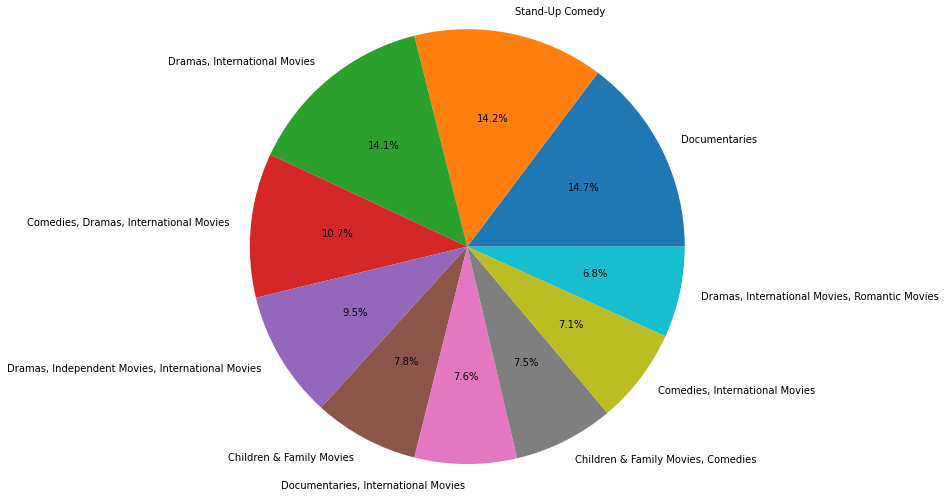

In [137]:
fig,ax = plt.subplots()
movies_df = netflix[netflix.type=="Movie"]
ax.pie(movies_df['listed_in'].value_counts().head(10).values,labels=movies_df['listed_in'].value_counts().head(10).index, radius = 2.5,autopct='%1.1f%%')
plt.show()

<h3> The above pie chart shows that documentaries seem to be the most popular genre in movies on Netflix </h3>

<h3> Top 10 Genre in TV shows on Netflix </h3>

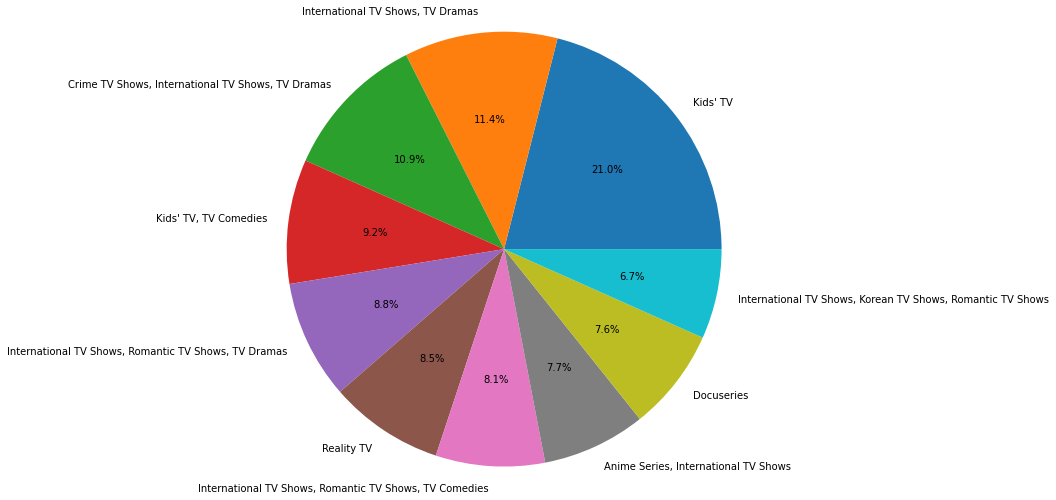

In [138]:
fig, ax = plt.subplots()
tv_show_df = netflix[netflix.type=='TV Show']
ax.pie(tv_show_df['listed_in'].value_counts().head(10).values,labels=tv_show_df['listed_in'].value_counts().head(10).index, radius = 2.5,autopct='%1.1f%%')
plt.show()

<h3> From the above barplot it is quite evident that the Kids TV is the most popular genre on Netflix  </h3>


## Recommender System
<h3> 1. Movie Recommendation using sigmoid kernel </h3>

In [28]:
movies = netflix_new[netflix_new['type']=='Movie'].reset_index()
movies = movies.drop(columns = ['duration','country','date_added','release_year','show_id','type','index','listed_in'])

In [29]:
movies['director'] = movies['director'].fillna("")
movies['cast'] = movies['cast'].fillna("")
movies['combined'] = movies['description']+movies['cast']+movies['director']
movies.head(5)

,title,director,cast,rating,description,combined
0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",TV-MA,After a devastating earthquake hits Mexico Cit...,After a devastating earthquake hits Mexico Cit...
1,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",R,"When an army recruit is found dead, his fellow...","When an army recruit is found dead, his fellow..."
2,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",PG-13,"In a postapocalyptic world, rag-doll robots hi...","In a postapocalyptic world, rag-doll robots hi..."
3,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",PG-13,A brilliant group of students become card-coun...,A brilliant group of students become card-coun...
4,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",TV-MA,"After an awful accident, a couple admitted to ...","After an awful accident, a couple admitted to ..."


In [30]:
tfv = TfidfVectorizer(min_df = 3,max_features = None,analyzer = 'word',token_pattern = 'r\w{1,}', ngram_range = (1,3), stop_words = 'english')

In [31]:
movies['combined'] = movies['combined'].fillna("")

In [32]:
tfv_matrix = tfv.fit_transform(movies['combined'])
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)
sig[0]
indices = pd.Series(movies.index,index = movies['title']).drop_duplicates()
indices

C:\Users\potea\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ral', 'rd', 'rds', 'ready', 'reafter', 'reas', 'reby', 'red', 'ree', 'refore', 'rehand', 'rein', 'reover', 'rest', 'reupon', 'rever', 'rhaps', 'ribe', 'ring', 'rious', 'rly', 'rmer', 'rmerly', 'rom', 'ront', 'ross', 'rough', 'roughout', 'round', 'rs', 'rself', 'rselves', 'rst', 'rt', 'rtheless', 'rther', 'rty', 'ru', 'rwards', 'rwise', 'ry', 'ryone', 'rything', 'rywhere'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


title
7:19                                          0
23:59                                         1
9                                             2
21                                            3
122                                           4
                                           ... 
Zoom                                       5372
Zozo                                       5373
Zubaan                                     5374
Zulu Man in Japan                          5375
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    5376
Length: 5377, dtype: int64

In [33]:
#Function to recommend movies based on watch history using sigmoid kernel
def recommend(title,sig=sig):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores,key = lambda x:x[1], reverse = True)
    sig_scores = sig_scores[1:11]
    movies_indices = [i[0] for i in sig_scores]
    return movies['title'].iloc[movies_indices]

In [34]:
recommend('Zulu Man in Japan')

2349                Kevin Hart: Seriously Funny
5230                What Would Sophia Loren Do?
376                       An American in Madras
1598                               French Toast
3573                               Reincarnated
4264                            The Bittersweet
2257            Joshua: Teenager vs. Superpower
965      Chingo Bling: They Can't Deport Us All
4214    The Adventures of Sharkboy and Lavagirl
4773                       The Skin of the Wolf
Name: title, dtype: object

In [35]:
recommend('The Cakemaker')

5374                             Zubaan
3917            Silent Hill: Revelation
1456                           Extremis
3016              My Life as a Zucchini
3724                            Saladin
2835             Michael Lost and Found
1408                              Enemy
3755    Sarah Silverman A Speck of Dust
5076                     Under The Skin
2704                             Maktub
Name: title, dtype: object

<h3> 2. TV shows recommendation using sigmoid kernel </h3>

In [36]:
shows = netflix_new[netflix_new['type']=='TV Show'].reset_index()
shows = shows.drop(columns = ['duration','country','date_added','release_year','show_id','type','index','listed_in'])

In [37]:
shows['director'] = shows['director'].fillna("")
shows['cast'] = shows['cast'].fillna("")
shows['combined'] = shows['cast']+shows['director']+shows['description']

In [38]:
shows.head()

,title,director,cast,rating,description,combined
0,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",TV-MA,In a future where the elite inhabit an island ...,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",TV-MA,A genetics professor experiments with a treatm...,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan..."
2,1983,,"Robert Więckiewicz, Maciej Musiał, Michalina O...",TV-MA,"In this dark alt-history thriller, a naïve law...","Robert Więckiewicz, Maciej Musiał, Michalina O..."
3,1994,Diego Enrique Osorno,,TV-MA,Archival video and new interviews examine Mexi...,Diego Enrique OsornoArchival video and new int...
4,Feb-09,,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",TV-14,"As a psychology professor faces Alzheimer's, h...","Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-..."


In [39]:
tfv = TfidfVectorizer(min_df = 3,max_features = None,analyzer = 'word',token_pattern = 'r\w{1,}', ngram_range = (1,3), stop_words = 'english')
shows['combined'] = shows['combined'].fillna("")

In [40]:
tfv_matrix_shows = tfv.fit_transform(shows['combined'])
sig = sigmoid_kernel(tfv_matrix_shows,tfv_matrix_shows)
sig[0]
indices = pd.Series(shows.index,index = shows['title']).drop_duplicates()
indices

C:\Users\potea\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ral', 'rd', 'rds', 'ready', 'reafter', 'reas', 'reby', 'red', 'ree', 'refore', 'rehand', 'rein', 'reover', 'rest', 'reupon', 'rever', 'rhaps', 'ribe', 'ring', 'rious', 'rly', 'rmer', 'rmerly', 'rom', 'ront', 'ross', 'rough', 'roughout', 'round', 'rs', 'rself', 'rselves', 'rst', 'rt', 'rtheless', 'rther', 'rty', 'ru', 'rwards', 'rwise', 'ry', 'ryone', 'rything', 'rywhere'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


title
3%                          0
46                          1
1983                        2
1994                        3
Feb-09                      4
                         ... 
Zindagi Gulzar Hai       2405
Zoids Wild               2406
Zombie Dumb              2407
Zona Rosa                2408
Zumbo's Just Desserts    2409
Length: 2410, dtype: int64

In [41]:
#Function to recommend TV shows based on watch history using sigmoid kernel
def recommend_tv(title,sig=sig):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores,key = lambda x:x[1], reverse = True)
    sig_scores = sig_scores[1:11]
    shows_indices = [i[0] for i in sig_scores]
    return shows['title'].iloc[shows_indices]

In [42]:
recommend_tv("Friends")

706                       Genius of the Modern World
418                 Comedians in Cars Getting Coffee
1960               The goop lab with Gwyneth Paltrow
1221                Melodies of Life - Born This Way
959                                       JingleKids
1777    Strawberry Shortcake: Berry Bitty Adventures
2285                        VeggieTales in the House
1640                                         Scandal
1279                 Monty Python Best Bits (mostly)
1282                    Monty Python's Flying Circus
Name: title, dtype: object

In [43]:
recommend("Crash Landing on You")

1647                   Gangaajal
4920                    Time Out
2571    Little Singham in London
3772                  Satyagraha
2459                       Laatu
2128              Ishqedarriyaan
3705                       Saaho
1826                  Haraamkhor
925                    Chamatkar
2517                        Lens
Name: title, dtype: object

<h3> 3. Movie recommendation using linear kernel </h3>

In [44]:
tfidf = TfidfVectorizer(stop_words='english')
movies['combined'] = movies['combined'].fillna('')
tfidf_matrix = tfidf.fit_transform(movies['combined'])
tfidf_matrix.shape

(5377, 40215)

In [45]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(5377, 5377)

In [46]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()
indices

title
7:19                                          0
23:59                                         1
9                                             2
21                                            3
122                                           4
                                           ... 
Zoom                                       5372
Zozo                                       5373
Zubaan                                     5374
Zulu Man in Japan                          5375
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    5376
Length: 5377, dtype: int64

In [47]:
#Function to recommend movies based on watch history using linear kernel
def recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

In [48]:
recommendations("Zubaan")

510                                       Baazaar
2176                             Jatts in Golmaal
4252            The Battered Bastards of Baseball
2302                                     Kajraare
1435                              Evening Shadows
421                       Ankur Arora Murder Case
3745                                        Sanju
2421    Krish Trish and Baltiboy: Face Your Fears
3027                                   My Own Man
1640                                         Game
Name: title, dtype: object

In [49]:
recommendations("Sanju")

3399                                         PK
2666                               Lust Stories
433                                       Anwar
4873                            The Zoya Factor
1844                       Haseena Maan Jaayegi
1222                         Dharam Sankat Mein
3378                Phir Bhi Dil Hai Hindustani
1259    Do Paise Ki Dhoop Chaar Aane Ki Baarish
1001                               Chup Chup Ke
1691                          Ghulam-E-Musthafa
Name: title, dtype: object

<h3> 4. TV Show recommendation using linear kernel </h3>

In [50]:
tfidf = TfidfVectorizer(stop_words='english')
shows['combined'] = shows['combined'].fillna('')
tfidf_matrix = tfidf.fit_transform(shows['combined'])
tfidf_matrix.shape

(2410, 23998)

In [51]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(2410, 2410)

<h3> Indexing the titles of the movies and TV shows using dataframes </h3>

In [52]:
indices = pd.Series(shows.index, index=shows['title']).drop_duplicates()
indices

title
3%                          0
46                          1
1983                        2
1994                        3
Feb-09                      4
                         ... 
Zindagi Gulzar Hai       2405
Zoids Wild               2406
Zombie Dumb              2407
Zona Rosa                2408
Zumbo's Just Desserts    2409
Length: 2410, dtype: int64

In [53]:
#Function to recommend TV shows based on watch history using linear kernel
def recommendations_tv_new(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    shows_indices = [i[0] for i in sim_scores]
    return shows['title'].iloc[shows_indices]


In [54]:
recommendations_tv_new("Friends")

598                  Episodes
1182          Man with a Plan
1092               Life Story
260           BoJack Horseman
447            Criminal Minds
959                JingleKids
752               Gossip Girl
248             Blood of Zeus
524     Dinotrux Supercharged
516                 Diagnosis
Name: title, dtype: object

In [55]:
recommendations_tv_new("It's Okay to Not Be Okay")

435     Crash Landing on You
2313            Was It Love?
2030         The Lies Within
1649           Secret Affair
911               Inheritors
933                     Iris
862        Hospital Playlist
1614                  Run On
164      Bad Guys: Vile City
878                    Hyena
Name: title, dtype: object

In [56]:
recommendations_tv_new("Breaking Bad")

212                Better Call Saul
2301                 W/ Bob & David
37              A Lion in the House
529                      Disjointed
877     Huntik: Secrets and Seekers
670         Food: Delicious Science
83                    Alexa & Katie
1570                    Refresh Man
373             Chill with Bob Ross
1664          Servant of the People
Name: title, dtype: object

In [57]:
recommendations_tv_new("Narcos")

2355               Wild District
576                    El Cartel
562           Dueños del paraíso
1966             The Great Heist
1341              Narcos: Mexico
1045            La Reina del Sur
1260               Miss Dynamite
1153    Luis Miguel - The Series
1043                   La Piloto
1693    Sin Senos sí Hay Paraíso
Name: title, dtype: object

In [58]:
recommendations_tv_new("Sacred Games")

715                 GHOUL
1819       Taj Mahal 1989
2123    The Truth Seekers
501           Delhi Crime
25              7 (Seven)
999         Khotey Sikkey
799        Hashoter Hatov
874              Humsafar
996                Khaani
2005          The Keepers
Name: title, dtype: object

In [59]:
recommendations_tv_new('The Hook Up Plan')

2172                        Til Death Do Us Part
1886                                  The Chalet
224                                Bibik-Bibikku
850     Holiday Home Makeover with Mr. Christmas
1770                                   Stone Age
1252                                   Mini Wolf
1878                                   The Break
1432                            P. King Duckling
1249                                   Mind Game
2165                                   Tidelands
Name: title, dtype: object

<h3> Thus, the recommendation using linear kernel works better than using sigmoid kernel</h3>